In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\Users\Alexandra\AppData\Local\Temp\ipykernel_10392\3381811058.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Эксперимент с игрой cookie cats: в версии для одной части игроков первое прохождение ворот происходит после 30-го уровня, в версии для другой части — после 40-го.

`version` — группа

`sum_gamerounds` — количество сыгранных игроком раундов

`retention_1` — вернулся ли игрок после первого дня игры

`retention_7` — вернулся ли игрок после седьмого дня игры

In [3]:
data = pd.read_csv("../data/cookie_cats.csv")
data

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


Пользователи уникальны:

In [5]:
data.userid.nunique()

90189

Что мы можем посчитать для этих групп:

In [6]:
# Коэффициент вариации
def cv(x):
    return np.std(x, ddof=1) / np.mean(x) * 100 

data.groupby("version").sum_gamerounds.agg(["count", "median", "max", "mean", "var", "std", cv])

,count,median,max,mean,var,std,cv
version,,,,,,,
gate_30,44700,17.0,49854,52.456264,65903.321897,256.716423,489.391359
gate_40,45489,16.0,2640,51.298776,10669.736422,103.294416,201.358444


Видим выброс

In [5]:
data.groupby("version").sum_gamerounds.quantile([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99, 1])

version      
gate_30  0.01        0.00
         0.05        1.00
         0.10        1.00
         0.20        4.00
         0.80       66.00
         0.90      135.00
         0.95      222.00
         0.99      493.00
         1.00    49854.00
gate_40  0.01        0.00
         0.05        1.00
         0.10        1.00
         0.20        3.00
         0.80       68.00
         0.90      134.00
         0.95      220.00
         0.99      492.12
         1.00     2640.00
Name: sum_gamerounds, dtype: float64

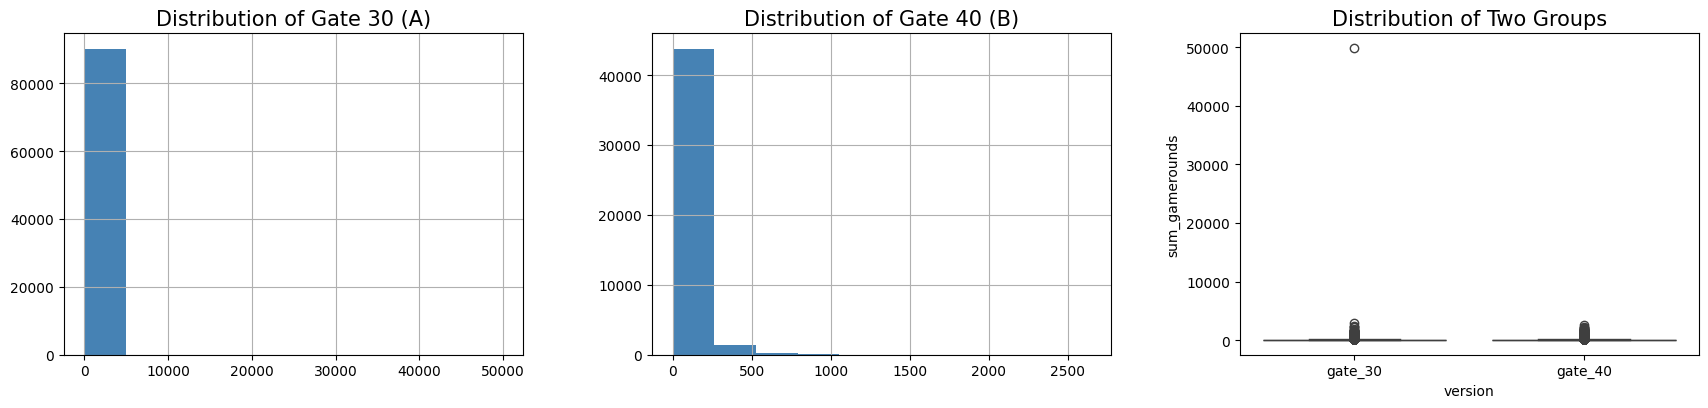

In [6]:
fig, axes = plt.subplots(1, 3, figsize = (18,5))
data.sum_gamerounds.hist(ax = axes[0], color = "steelblue")
data[(data.version == "gate_30")].hist("sum_gamerounds", ax = axes[0], color = "steelblue")
data[(data.version == "gate_40")].hist("sum_gamerounds", ax = axes[1], color = "steelblue")
sns.boxplot(x = data.version, y = data.sum_gamerounds, ax = axes[2])

axes[0].set_title("Distribution of Gate 30 (A)", fontsize = 15)
axes[1].set_title("Distribution of Gate 40 (B)", fontsize = 15)
axes[2].set_title("Distribution of Two Groups", fontsize = 15)

plt.tight_layout(pad = 4);

<Axes: xlabel='index'>

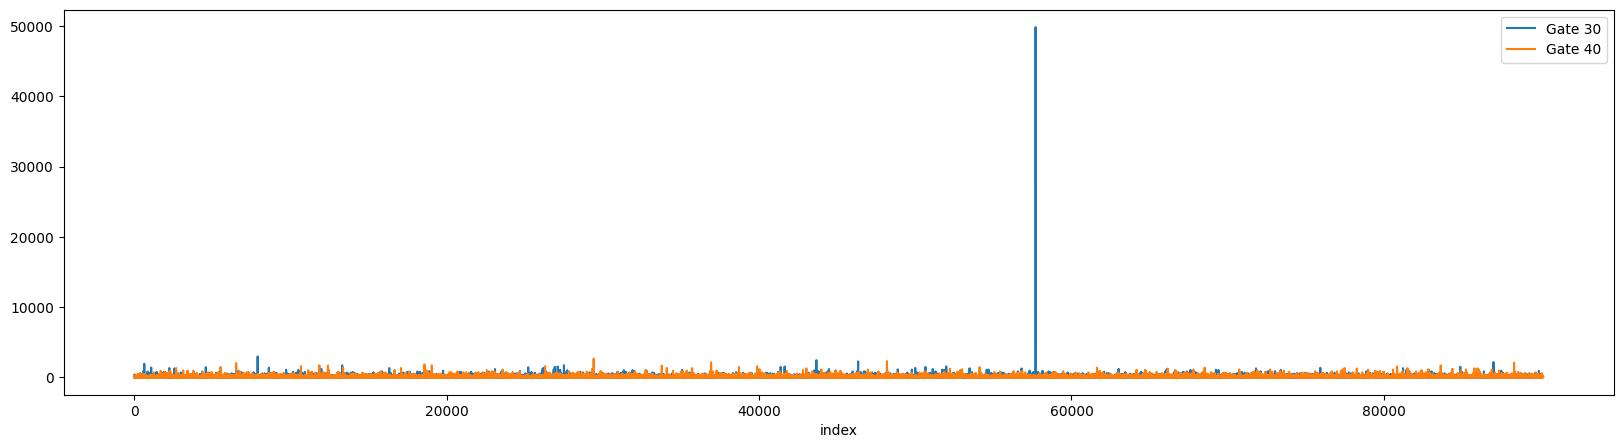

In [8]:
data[data.version == "gate_30"].reset_index().set_index("index").sum_gamerounds.plot(legend = True, label = "Gate 30", figsize = (20,5))
data[data.version == "gate_40"].reset_index().set_index("index").sum_gamerounds.plot(legend = True, label = "Gate 40")

Уберём максимальное значение:

In [9]:
data.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["sum_gamerounds"]].T

,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
sum_gamerounds,90189.0,51.872457,195.050858,0.0,0.0,1.0,1.0,3.0,16.0,67.0,134.0,221.0,493.0,49854.0


In [4]:
data_no_max = data[data.sum_gamerounds < data.sum_gamerounds.max()]
data_no_max.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["sum_gamerounds"]].T

,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
sum_gamerounds,90188.0,51.320253,102.682719,0.0,0.0,1.0,1.0,3.0,16.0,67.0,134.0,221.0,493.0,2961.0


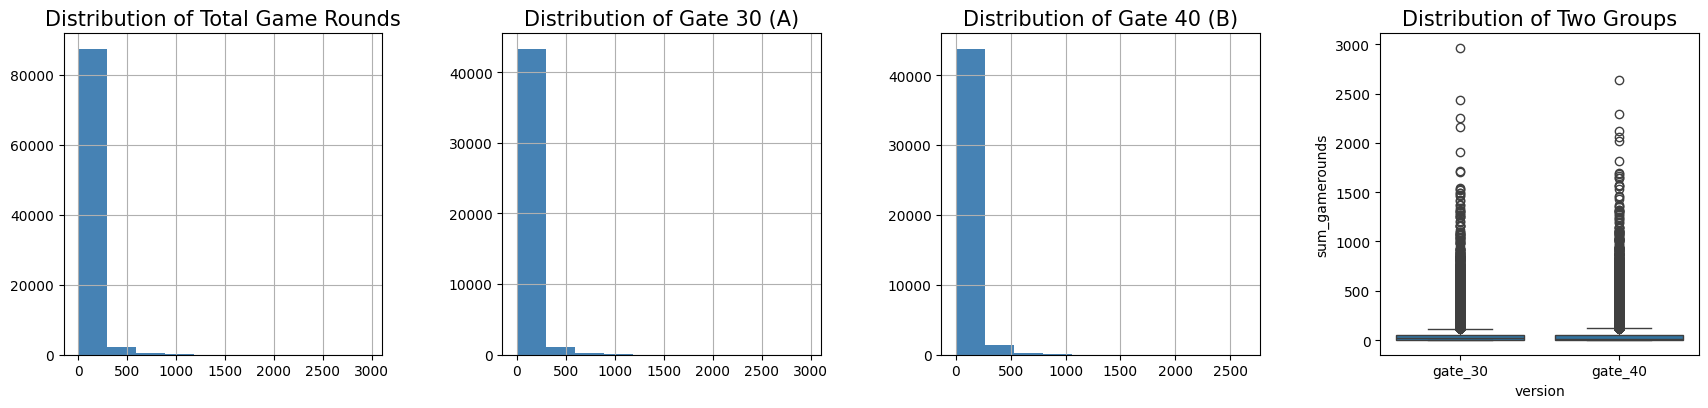

In [12]:
fig, axes = plt.subplots(1, 4, figsize = (18,5))
data_no_max.sum_gamerounds.hist(ax = axes[0], color = "steelblue")
data_no_max[(data_no_max.version == "gate_30")].hist("sum_gamerounds", ax = axes[1], color = "steelblue")
data_no_max[(data_no_max.version == "gate_40")].hist("sum_gamerounds", ax = axes[2], color = "steelblue")
sns.boxplot(x = data_no_max.version, y = data_no_max.sum_gamerounds, ax = axes[3])

axes[0].set_title("Distribution of Total Game Rounds", fontsize = 15)
axes[1].set_title("Distribution of Gate 30 (A)", fontsize = 15)
axes[2].set_title("Distribution of Gate 40 (B)", fontsize = 15)
axes[3].set_title("Distribution of Two Groups", fontsize = 15)

plt.tight_layout(pad = 4)

<Axes: xlabel='index'>

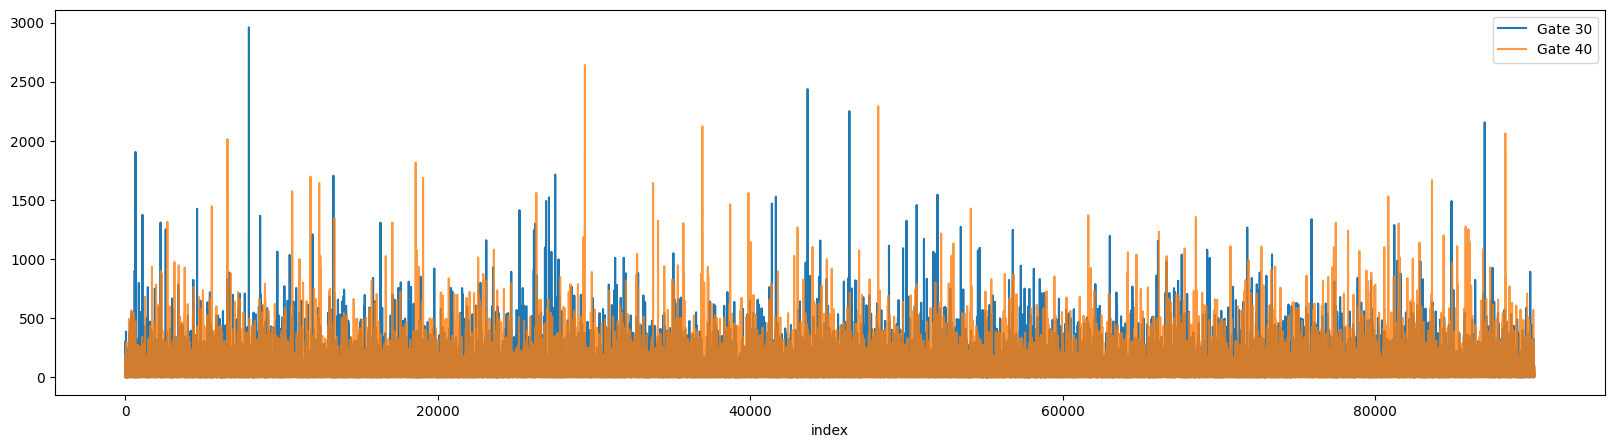

In [13]:
data_no_max[data_no_max.version == "gate_30"].reset_index().set_index("index").sum_gamerounds.plot(legend = True, label = "Gate 30", figsize = (20,5))
data_no_max[data_no_max.version == "gate_40"].reset_index().set_index("index").sum_gamerounds.plot(legend = True, label = "Gate 40", alpha = 0.8)

In [14]:
data_no_max.groupby("version").sum_gamerounds.agg(["count", "median", "max", "mean", "var", "std", cv])

,count,median,max,mean,var,std,cv
version,,,,,,,
gate_30,44699,17.0,2961,51.342111,10415.753288,102.057598,198.779514
gate_40,45489,16.0,2640,51.298776,10669.736422,103.294416,201.358444


* Часть людей, установивших игру, не играла совсем
* С ростом уровня уменьшается количество игроков

<Axes: xlabel='sum_gamerounds'>

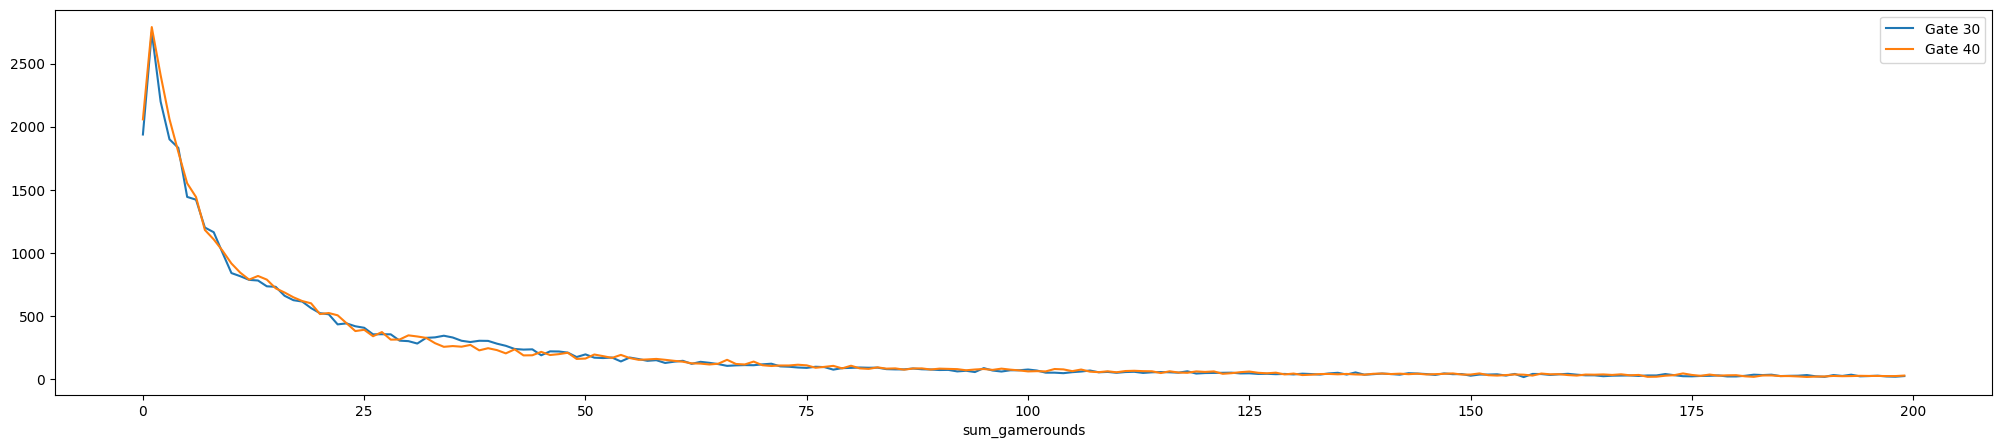

In [55]:
data_no_max[data_no_max.version == "gate_30"].groupby("sum_gamerounds").userid.count()[:200].plot(legend = True, label = "Gate 30", figsize = (25,5))
data_no_max[data_no_max.version == "gate_40"].groupby("sum_gamerounds").userid.count()[:200].plot(legend = True, label = "Gate 40")

In [14]:
data_no_max.sum_gamerounds[data_no_max.sum_gamerounds >= 30].count(), data_no_max.sum_gamerounds[data_no_max.sum_gamerounds >= 40].count()

(33268, 27392)

`retention_1` — вернулся ли игрок после первого дня игры

`retention_7` — вернулся ли игрок после седьмого дня игры, может быть более показательной характеристикой для эксперимента, т.к. к седьмому дню игроки с большей вероятностью дойдут до 30-40 уровней

In [15]:
pd.DataFrame({"RET1_COUNT": data_no_max["retention_1"].value_counts(),
              "RET7_COUNT": data_no_max["retention_7"].value_counts(),
              "RET1_RATIO": data_no_max["retention_1"].value_counts() / len(data_no_max),
              "RET7_RATIO": data_no_max["retention_7"].value_counts() / len(data_no_max)})

,RET1_COUNT,RET7_COUNT,RET1_RATIO,RET7_RATIO
False,50035,73408,0.554786,0.813944
True,40153,16780,0.445214,0.186056


In [16]:
data_no_max.groupby(["version", "retention_1"]).sum_gamerounds.agg(["count", "median", "max", "mean", "var", "std"])

count  median   max       mean           var         std
version retention_1                                                          
gate_30 False        24665     6.0  1072  16.359092   1334.325921   36.528426
        True         20034    48.0  2961  94.411700  18235.179569  135.037697
gate_40 False        25370     6.0  1241  16.340402   1290.659951   35.925756
        True         20119    49.0  2640  95.381182  19012.895403  137.887256

Bootstrapping (семплирование)

Из всего объёма данных (генеральной совокупности) возьмём n случайных выборок, вычислим средние.

In [21]:
n = 1000
boot_1d = []
for i in range(n):
    boot_mean = data_no_max.sample(frac = 1, replace = True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)
boot_1d = pd.DataFrame(boot_1d)
boot_1d['diff'] = boot_1d.gate_30 - boot_1d.gate_40
boot_1d

version,gate_30,gate_40,diff
retention_1,0.447782,0.437729,0.010053
retention_1,0.446749,0.441894,0.004855
retention_1,0.444173,0.444720,-0.000547
retention_1,0.449530,0.441479,0.008051
retention_1,0.449380,0.445299,0.004081
...,...,...,...
retention_1,0.448741,0.439372,0.009368
retention_1,0.449974,0.443680,0.006294
retention_1,0.445899,0.444281,0.001618
retention_1,0.446834,0.439256,0.007577


По ЦПТ выборочные средние должны быть распределены нормально, а их среднее будет примерно совпадать со средним генеральной совокупности.

In [72]:
bootstrap_means = boot_1d[["gate_30", "gate_40"]].mean()
general_means = data_no_max.groupby('version')['retention_1'].mean()
pd.concat([general_means.rename('general'), bootstrap_means.rename('bootstrap')], axis=1)

,general,bootstrap
version,,
gate_30,0.448198,0.448170
gate_40,0.442283,0.442177


<Axes: ylabel='Frequency'>

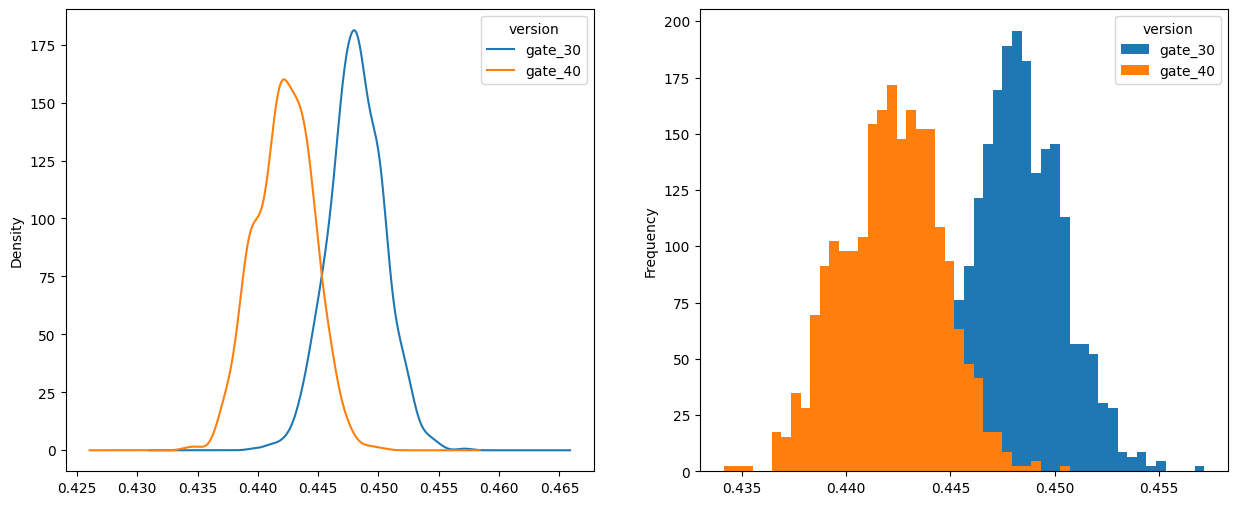

In [75]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
boot_1d[["gate_30", "gate_40"]].plot(kind='density', xlabel='means', ax=ax1)
boot_1d[["gate_30", "gate_40"]].plot(kind='hist', bins=50, density=True, ax=ax2)

In [150]:
alpha = 0.05
p_l = (alpha/2) * 100
lower = np.percentile(np.array(boot_1d['diff']), p_l)
p_l, lower

(2.5, -0.0006727782646191156)

In [151]:
p_u = ((1 - alpha) + (alpha/2)) * 100
upper = np.percentile(np.array(boot_1d['diff']), p_u)
p_u, upper

(97.5, 0.012494203280203939)

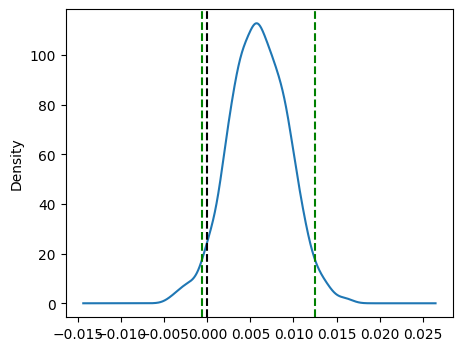

In [147]:
boot_1d['diff'].plot(kind='density', figsize=(5, 4))
plt.axvline(x=0, color='black', linestyle='--')
plt.axvline(x=lower, color='green', linestyle='--')
plt.axvline(x=upper, color='green', linestyle='--')

Вероятность, что `retention_1` в группе `gate_30` больше:

In [97]:
(boot_1d['diff'] > 0).mean()

0.962

Посмотрим на `retention_7`

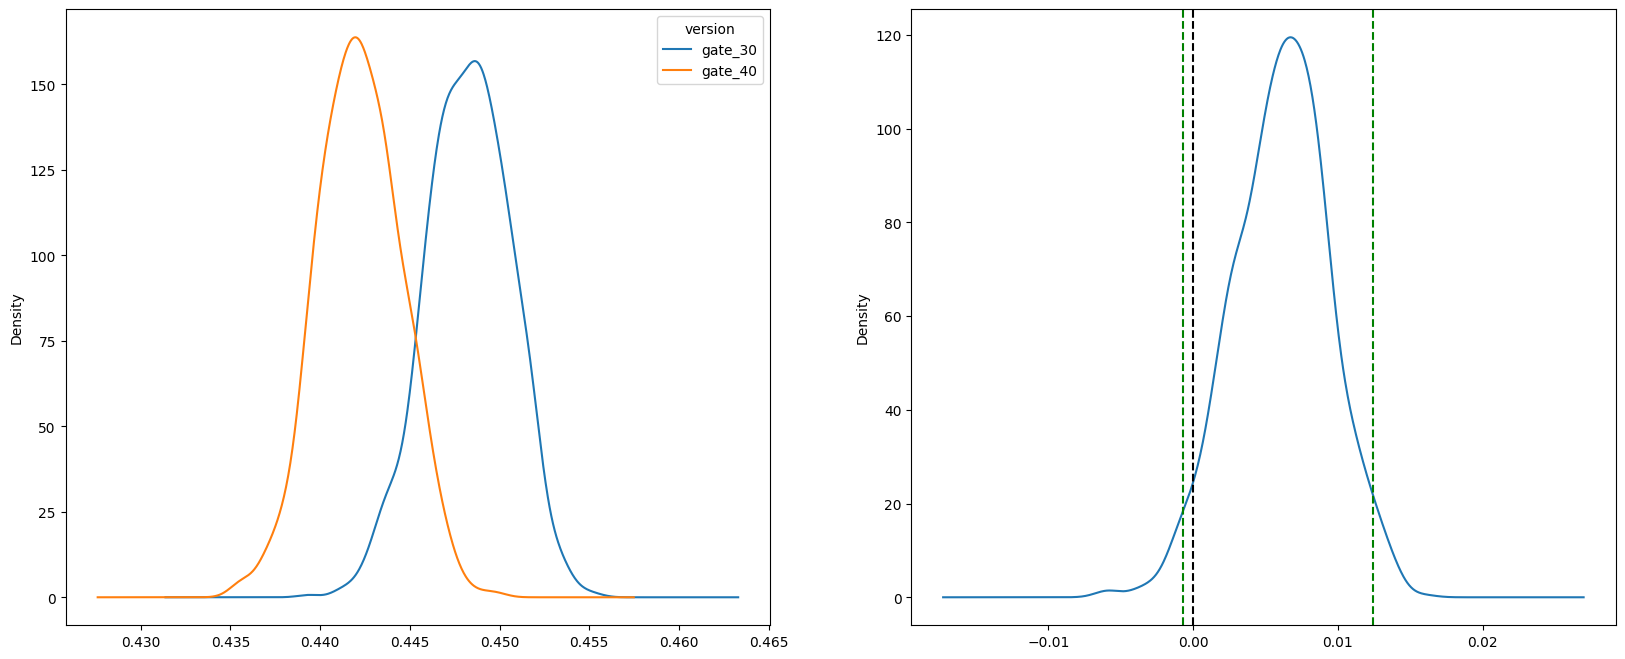

In [153]:
n = 1000
boot_7d = []
for i in range(n):
    boot_mean = data_no_max.sample(frac = 1, replace = True).groupby('version')['retention_1'].mean()
    boot_7d.append(boot_mean)
boot_7d = pd.DataFrame(boot_7d)
boot_7d['diff'] = boot_7d.gate_30 - boot_7d.gate_40

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
boot_7d[["gate_30", "gate_40"]].plot(kind='density', ax=ax1)
boot_7d['diff'].plot(kind='density', ax=ax2)
p_l = (alpha / 2) * 100
lower = np.percentile(np.array(boot_7d['diff']), p_l)
p_u = ((1 - alpha) + (alpha / 2)) * 100
upper = np.percentile(np.array(boot_7d['diff']), p_u)
plt.axvline(x=0, color='black', linestyle='--')
plt.axvline(x=lower, color='green', linestyle='--')
plt.axvline(x=upper, color='green', linestyle='--')

In [57]:
data_no_max.groupby(["version", "retention_7"]).sum_gamerounds.agg(["count", "median", "max", "mean", "var", "std"])

count  median   max        mean           var         std
version retention_7                                                           
gate_30 False        36198    11.0   981   25.796508   1876.289557   43.316158
        True          8501   105.0  2961  160.117516  32169.492894  179.358560
gate_40 False        37210    11.0  2640   25.856356   1971.902798   44.406112
        True          8279   111.0  2294  165.649837  33779.682517  183.792499

## Проверка гипотез, статистические критерии

Нулевая гипотеза: нет связи между наблюдениями в двух выборках (нет статистически значимой разницы)

$H_0: \mu_1 = \mu_2$

Альтернатива:

$H_1: \mu_1 \neq \mu_2$



Результат статистического критерия: p-value

Условие отвержения нулевой гипотезы: p-value пересекает уровень значимости $\alpha$

In [5]:
groupA = data_no_max[data_no_max.version == "gate_30"]["sum_gamerounds"]
groupB = data_no_max[data_no_max.version == "gate_40"]["sum_gamerounds"]

Для определения нормальности распределения воспользуемся тестом Шапиро-Уилка:

H0: выборка взята из генеральной совокупности с нормальным распределением

H1: выборка взята из генеральной совокупности с другим распределением

In [126]:
from scipy.stats import shapiro

shapiro_alpha = 0.05
ntA = shapiro(groupA.sample(n=5000)).pvalue < shapiro_alpha
ntB = shapiro(groupB.sample(n=5000)).pvalue < shapiro_alpha
ntA and ntB

True

In [84]:
from scipy.stats import levene

levene(groupA, groupB)

LeveneResult(statistic=0.07510153837481241, pvalue=0.7840494387892463)

In [82]:
from scipy.stats import ttest_ind

ttest_ind(groupA, groupB, equal_var=False)

TtestResult(statistic=0.06337426312892294, pvalue=0.9494686215464458, df=90183.29806281235)

С помощью критерия показали, что данные не распределены нормально, для проверки гипотез на таком датасете можно использовать непараметрический тест Манна-Уитни

In [75]:
from scipy.stats import mannwhitneyu

alpha = 0.05
pvalue = mannwhitneyu(groupB, groupA).pvalue
pvalue, pvalue < alpha

(0.05089155279145376, False)

Гипотеза $H_0$ $(\mu_1 = \mu_2)$ не опровергнута, нет статистически значимой разницы

## А сколько вообще нужно экспериментов

In [14]:
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

a_size = 0
sizes = []
pvals = []
while a_size < len(groupA):
    a_size = min(a_size + 100, len(groupA))
    b_size = min(a_size, len(groupB))
    a_sample = groupA[:a_size]
    b_sample = groupB[:b_size]
    sizes.append(a_size)
    pvals.append(mannwhitneyu(a_sample, b_sample)[1])

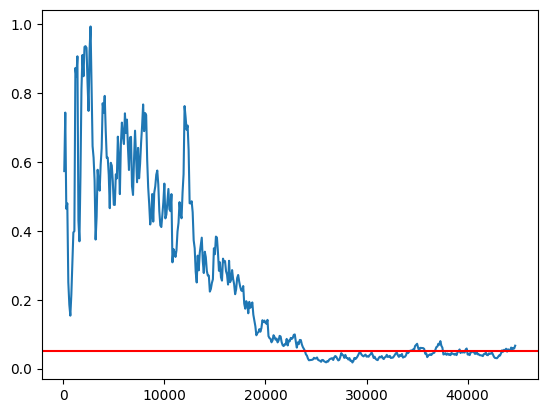

In [17]:
plt.plot(sizes, pvals)
plt.axhline(y=0.05, color='r')
plt.show()

In [18]:
import statsmodels.stats.api as sms

In [36]:
#baseline_rate = groupA.mean() / groupA.max()
baseline_rate = data_no_max[data_no_max.version == "gate_30"].retention_7.mean()
baseline_rate

0.19018322557551623

In [38]:
MDE = 0.01
effect_size = sms.proportion_effectsize(baseline_rate, baseline_rate + MDE)
required_n = sms.NormalIndPower().solve_power(effect_size, power=0.8, alpha=0.05, ratio=1)
effect_size, required_n

(-0.02523261218127859, 24655.4072800804)